# Decision Tree

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [70]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
df = df[['pclass','sex','age','sibsp','parch','fare', 'survived']]


In [72]:
df

,pclass,sex,age,sibsp,parch,fare,survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


### Label Encoding

In [73]:
df= pd.get_dummies(df, columns=['sex'])

df



,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male
0,3,22.0,1,0,7.2500,0,0,1
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1
887,1,19.0,0,0,30.0000,1,1,0
888,3,NaN,1,2,23.4500,0,1,0
889,1,26.0,0,0,30.0000,1,0,1


In [74]:
df.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
survived        0
sex_female      0
sex_male        0
dtype: int64

In [75]:
df.fillna(df['age'].mean(), inplace=True)



In [76]:
df.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
survived      0
sex_female    0
sex_male      0
dtype: int64

In [77]:
df.nunique()

pclass          3
age            89
sibsp           7
parch           7
fare          248
survived        2
sex_female      2
sex_male        2
dtype: int64

<Axes: xlabel='fare', ylabel='Count'>

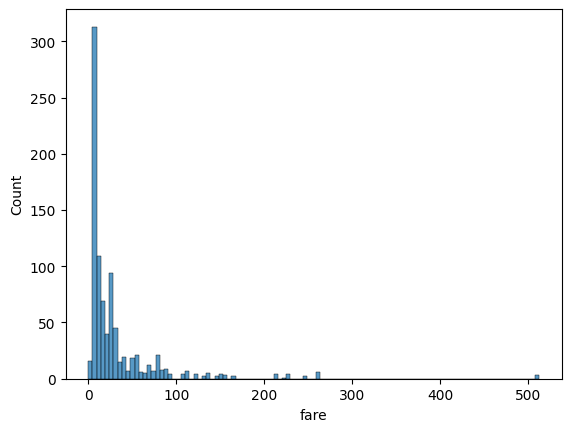

In [78]:
sns.histplot(df['fare'])

In [79]:
df['fare']= np.log(df['fare'])

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='fare', ylabel='Count'>

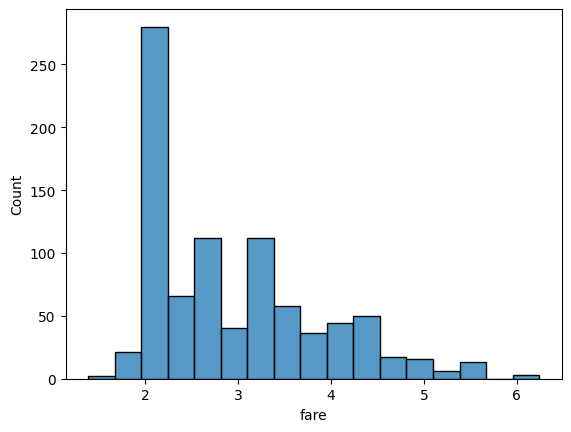

In [80]:
sns.histplot(df['fare'])

<Axes: ylabel='age'>

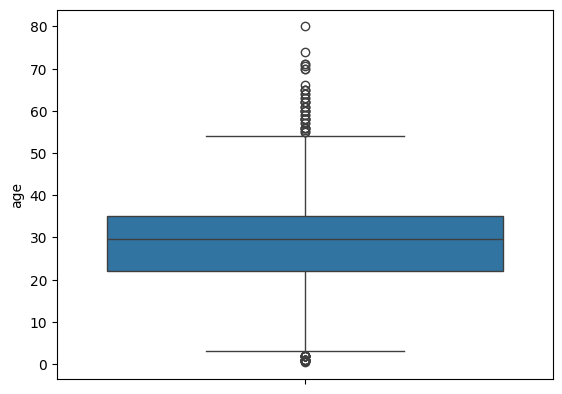

In [81]:
sns.boxplot(df['age'])

In [82]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)

IQR=Q3-Q1

upper_bound= Q3 +1.5*IQR
lower_bound= Q1 -1.5*IQR

df=df[(df['age']< upper_bound) & (df['age']> lower_bound)]


<Axes: ylabel='age'>

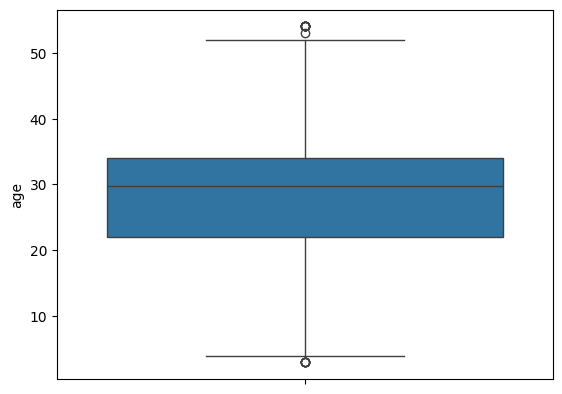

In [83]:
sns.boxplot(df['age'])

<Axes: ylabel='fare'>

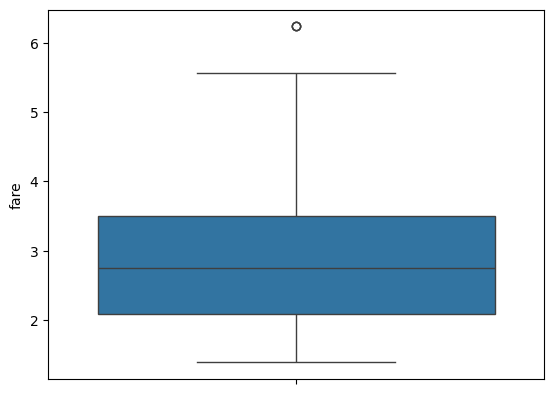

In [68]:
sns.boxplot(df['fare'])

In [84]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)

IQR=Q3-Q1

upper_bound= Q3 +1.5*IQR
lower_bound= Q1 -1.5*IQR

df=df[(df['fare']< upper_bound) & (df['fare']> lower_bound)]

<Axes: ylabel='fare'>

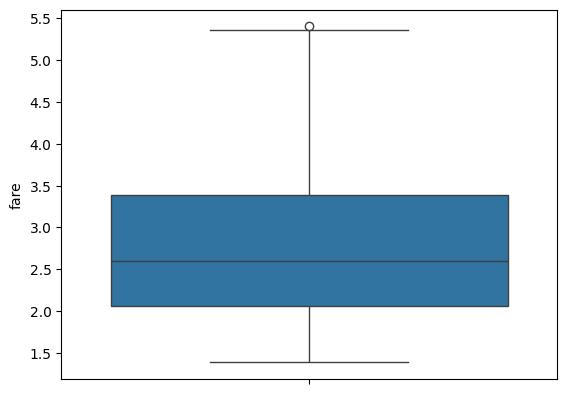

In [85]:
sns.boxplot(df['fare'])

In [86]:
df.drop_duplicates(inplace=True)

In [87]:

from sklearn.preprocessing import MinMaxScaler # For scalling in between 0_1

Cols=['age','fare']
scaler= MinMaxScaler()

df[Cols]= scaler.fit_transform(df[Cols])
df


,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male
0,3,0.372549,1,0,0.147445,0,0,1
1,1,0.686275,1,0,0.717113,1,1,0
2,3,0.450980,0,0,0.169632,1,1,0
3,1,0.627451,1,0,0.643716,1,1,0
4,3,0.627451,0,0,0.173532,0,0,1
...,...,...,...,...,...,...,...,...
885,3,0.705882,0,5,0.494030,0,1,0
887,1,0.313725,0,0,0.501408,1,1,0
888,3,0.523512,1,2,0.440014,0,1,0
889,1,0.450980,0,0,0.501408,1,0,1


In [88]:
df.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived', 'sex_female',
       'sex_male'],
      dtype='object')

In [101]:
x = df[['pclass','age','sibsp','parch','fare', 'sex_female',
       'sex_male']]

y = df['survived']


In [102]:
len(df['survived'])

690

In [103]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=10)

# Random State

In [104]:
model= DecisionTreeClassifier()

In [105]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [106]:
predictions= model.predict(x_test)

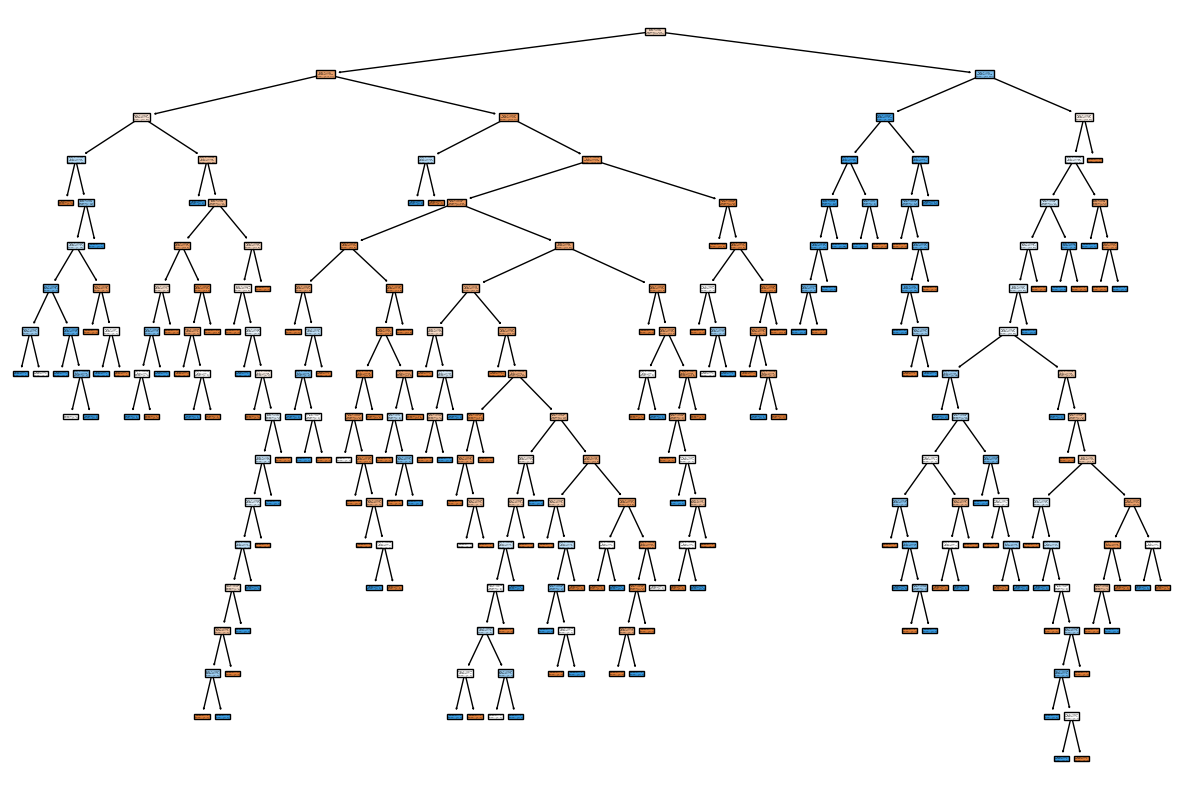

<Figure size 640x480 with 0 Axes>

In [107]:
# show tree

plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)
plt.show()
plt.savefig('tree.pdf', format='pdf' ,dpi=300)

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [110]:
accuracy_score(y_test, predictions)

# overall all cetogories

0.6884057971014492

In [111]:
precision_score(y_test, predictions)



0.6071428571428571

Precision: proportion of true positive predictions among all positive predictions\
Mathematically, precision is calculated as the ratio of true positives to the sum of true positives and false positives:

In [112]:
recall_score(y_test, predictions)



0.6181818181818182

Recall: proportion of true positive predictions among all actual positive instances.\
recall is calculated as the ratio of true positives to the sum of true positives and false negatives:

In [113]:
f1_score(y_test, predictions)

# average(harmonic mean) of precision and recall



0.6126126126126126

The formula for the harmonic mean is: n / (1/x₁ + 1/x₂ + ... + 1/xₙ), where 'n' represents the count of numbers.

For example, if we want to calculate the harmonic mean of 3, 5, and 7:
(3 + 5 + 7) / (1/3 + 1/5 + 1/7) = 15 / (1/3 + 1/5 + 1/7)

**Harmonic Mean:** It is the average of reciprocal values, which helps measure multiplicative relationships.

### Confusion Matrix

![image](Extra\24.png)


In [114]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, predictions)

([<matplotlib.axis.YTick at 0x2230c417e80>,
 [Text(0, 0, 'Survived'), Text(0, 1, 'Not_Survived')])

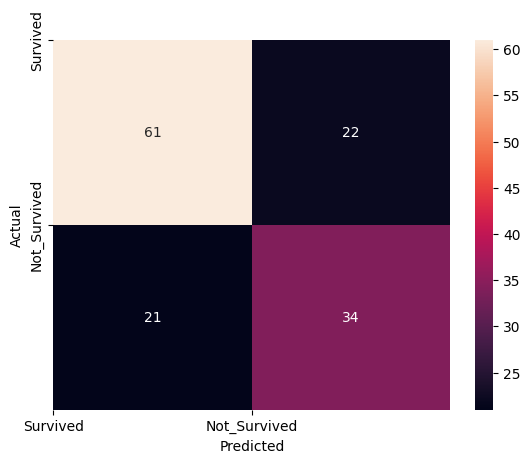

In [115]:
sns.heatmap(cm, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.xticks([0, 1], ['Survived', 'Not_Survived'])
plt.yticks([0, 1], ['Survived', 'Not_Survived'])


# K Nearest Neighbour

In [116]:
from sklearn.neighbors import  KNeighborsClassifier
k_model= KNeighborsClassifier(n_neighbors=3)# This changing value
                                            # known as hyperparameter tuning

In [117]:
k_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
k_prediction= k_model.predict( x_test)

In [119]:
accuracy_score(y_test, k_prediction)

0.7246376811594203

In [120]:
k_cm= confusion_matrix(y_test, k_prediction)

<Axes: >

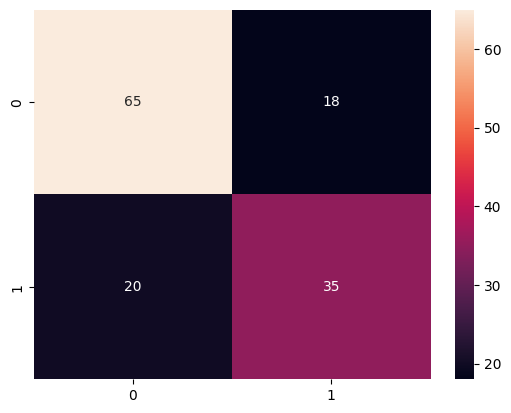

In [121]:
sns.heatmap(k_cm, annot=True)

#### Grid Search Cross Validation
for sekecting better k_no.

# Random Forest


accuracy 0.7246376811594203
precision 0.660377358490566
recall 0.6363636363636364
Axes(0.125,0.11;0.62x0.77)


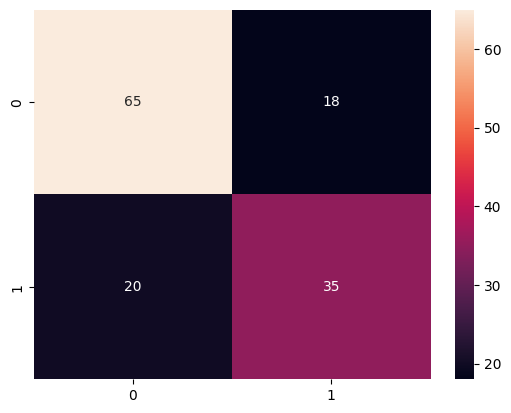

In [122]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train, y_train)
predictions= model.predict( x_test)
print('accuracy', accuracy_score(y_test, predictions))
print('precision', precision_score(y_test, predictions))
print('recall', recall_score(y_test, predictions))

cm= confusion_matrix(y_test, predictions)
print(sns.heatmap(cm, annot=True))



# Logistic Regression
It is a classification Model

**Sigmoid fuction :**  It divides the input into two classes


accuracy 0.7318840579710145
precision 0.6666666666666666
recall 0.6545454545454545
Axes(0.125,0.11;0.62x0.77)


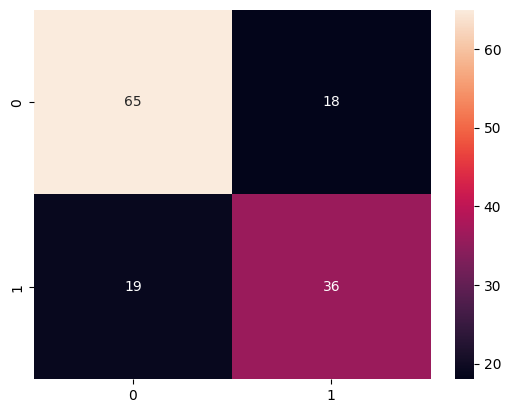

In [123]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)
predictions= model.predict( x_test)
print('accuracy', accuracy_score(y_test, predictions))
print('precision', precision_score(y_test, predictions))
print('recall', recall_score(y_test, predictions))

cm= confusion_matrix(y_test, predictions)
print(sns.heatmap(cm, annot=True))



# SVM (Support Vector Machine)

![image](Extra\25.png)

accuracy 0.7753623188405797
precision 0.75
recall 0.6545454545454545
Axes(0.125,0.11;0.62x0.77)


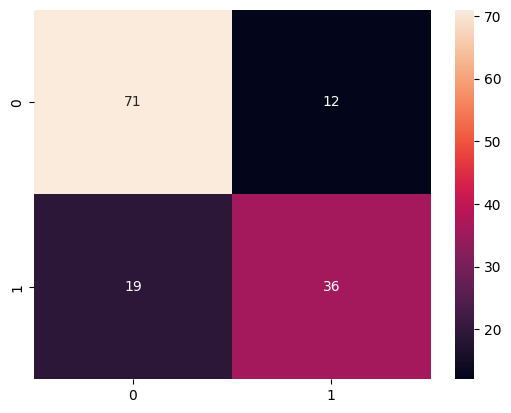

In [124]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train, y_train)
predictions= model.predict( x_test)
print('accuracy', accuracy_score(y_test, predictions))
print('precision', precision_score(y_test, predictions))
print('recall', recall_score(y_test, predictions))

cm= confusion_matrix(y_test, predictions)
print(sns.heatmap(cm, annot=True))


# Naive Base

accuracy 0.7101449275362319
precision 0.6271186440677966
recall 0.6727272727272727
Axes(0.125,0.11;0.62x0.77)


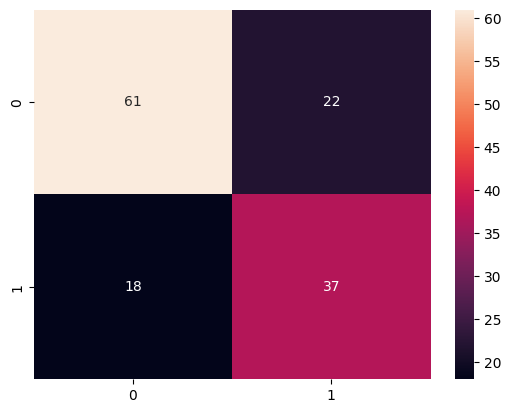

In [125]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train, y_train)
predictions= model.predict( x_test)
print('accuracy', accuracy_score(y_test, predictions))
print('precision', precision_score(y_test, predictions))
print('recall', recall_score(y_test, predictions))

cm= confusion_matrix(y_test, predictions)
print(sns.heatmap(cm, annot=True))


# choosing the Best Model

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score


In [127]:
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

In [128]:
# Cross-validation
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()


In [129]:
# Print mean accuracy for each classifier
for name, score in results.items():
    print(f"{name}: {score}")

kNN: 0.7464045864045865
Decision Tree: 0.7735135135135136
Random Forest: 0.7935135135135135
SVM: 0.7844226044226044
Logistic Regression: 0.7717280917280918
Naive Bayes: 0.7699426699426699


In [130]:
# Select best model based on mean accuracy
best_model = max(results, key=results.get)
print(f"Best Model: {best_model}")

Best Model: Random Forest


**On the basis of f1 score**

In [131]:
classifiers= {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}


results= {}
for name, clf in classifiers.items():
    scores= cross_val_score(clf, x_train, y_train, cv=5, scoring='f1_macro')
    results[name]= scores.mean()

for name, score in results.items():
    print(f"{name}: {score}")

best_model= max(results, key=results.get)
print(f'Best Model: {best_model}')

kNN: 0.7350243730887448
Decision Tree: 0.7629127036199326
Random Forest: 0.7750143916339974
SVM: 0.7704814688406996
Logistic Regression: 0.764348547778116
Naive Bayes: 0.7619083294202921
Best Model: Random Forest
